In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
'C:\Program' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import numpy as np 
import pandas as pd 
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
plt.style.use('bmh')

In [12]:
# load and store stock data into frame
df = pd.read_csv('Data/TSLA.csv')
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-09-16,49.200001,49.486000,48.234001,48.562000,48.562000,23640500
1,2019-09-17,48.493999,49.119999,48.074001,48.958000,48.958000,19327000
2,2019-09-18,49.000000,49.633999,48.473999,48.698002,48.698002,20851000
3,2019-09-19,49.200001,49.588001,48.967999,49.320000,49.320000,23979000
4,2019-09-20,49.298000,49.389999,47.632000,48.124001,48.124001,31765000
5,2019-09-23,48.000000,49.035999,47.844002,48.245998,48.245998,21701000


In [13]:
# get the number of trading days (251 in this case)
df.shape

(251, 7)

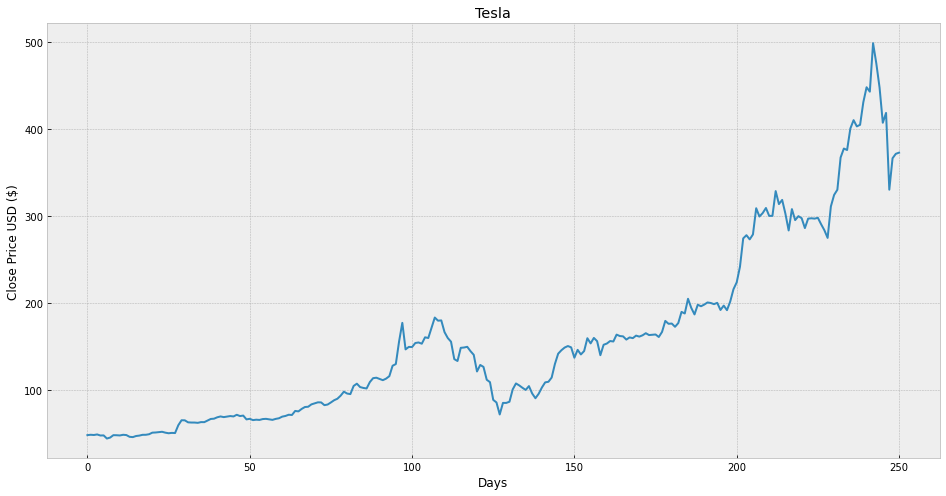

In [14]:
# visualize the close price data
plt.figure(figsize=(16, 8))
plt.title('Tesla')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.show()

In [15]:
# Get the close price
df = df[['Close']]
df.head(4)

,Close
0,48.562000
1,48.958000
2,48.698002
3,49.320000


In [19]:
# create a variable to predict the 'x' days into the future
future_days = 25

# create a new column (target), shifted 'x' days up
df['Prediction'] = df[['Close']].shift(-future_days)

df.head(5)
# df.tail(4)

,Close,Prediction
0,48.562000,50.700001
1,48.958000,51.116001
2,48.698002,50.936001
3,49.320000,59.936001
4,48.124001,65.625999


In [20]:
# Create the feature data set (x) and convert it to a numpy array and remove the last 'x' rows/days
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[ 48.562   ]
 [ 48.958   ]
 [ 48.698002]
 [ 49.32    ]
 [ 48.124001]
 [ 48.245998]
 [ 44.641998]
 [ 45.740002]
 [ 48.512001]
 [ 48.425999]
 [ 48.174   ]
 [ 48.938   ]
 [ 48.625999]
 [ 46.605999]
 [ 46.285999]
 [ 47.543999]
 [ 48.009998]
 [ 48.905998]
 [ 48.948002]
 [ 49.577999]
 [ 51.391998]
 [ 51.577999]
 [ 51.950001]
 [ 52.394001]
 [ 51.389999]
 [ 50.700001]
 [ 51.116001]
 [ 50.936001]
 [ 59.936001]
 [ 65.625999]
 [ 65.542   ]
 [ 63.243999]
 [ 63.001999]
 [ 62.984001]
 [ 62.661999]
 [ 63.493999]
 [ 63.444   ]
 [ 65.316002]
 [ 67.108002]
 [ 67.428001]
 [ 69.017998]
 [ 69.986   ]
 [ 69.222   ]
 [ 69.870003]
 [ 70.433998]
 [ 69.998001]
 [ 71.903999]
 [ 70.444   ]
 [ 70.966003]
 [ 66.608002]
 [ 67.267998]
 [ 65.783997]
 [ 66.258003]
 [ 65.987999]
 [ 66.973999]
 [ 67.239998]
 [ 66.606003]
 [ 66.073997]
 [ 67.178001]
 [ 67.905998]
 [ 69.767998]
 [ 70.540001]
 [ 71.935997]
 [ 71.678001]
 [ 76.300003]
 [ 75.797997]
 [ 78.629997]
 [ 80.807999]
 [ 81.117996]
 [ 83.844002]
 [ 85.050003]
 [ 86.

In [21]:
# create the target data set (y) and convert it to a numpy array and get all the target values except the last 'x' rows/days
Y = np.array(df['Prediction'])[:-future_days]
print(Y)

[ 50.700001  51.116001  50.936001  59.936001  65.625999  65.542
  63.243999  63.001999  62.984001  62.661999  63.493999  63.444
  65.316002  67.108002  67.428001  69.017998  69.986     69.222
  69.870003  70.433998  69.998001  71.903999  70.444     70.966003
  66.608002  67.267998  65.783997  66.258003  65.987999  66.973999
  67.239998  66.606003  66.073997  67.178001  67.905998  69.767998
  70.540001  71.935997  71.678001  76.300003  75.797997  78.629997
  80.807999  81.117996  83.844002  85.050003  86.188004  86.075996
  82.940002  83.666     86.052002  88.601997  90.307999  93.811996
  98.428001  96.267998  95.629997 104.972    107.584    103.699997
 102.697998 102.099998 109.440002 113.912003 114.440002 112.963997
 111.603996 113.379997 116.197998 128.162003 130.113998 156.
 177.412003 146.940002 149.792007 149.613998 154.255997 154.876007
 153.457993 160.800003 160.005997 171.679993 183.483994 179.882004
 180.199997 166.757996 159.981995 155.759995 135.800003 133.598007
 148.72399

In [22]:
# split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

In [26]:
# create the models
# create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)

# create the linear regresion model
lr = LinearRegression().fit(x_train, y_train)

In [27]:
# Get the last 'x' rows of the feature data set
x_future = df.drop(['Prediction'], 1)[:-future_days]

# Get the last rows for the last 25 days
x_future = x_future.tail(future_days)
# convert to np array
x_future = np.array(x_future)
# show x_future:
x_future

array([[241.731995],
       [274.31601 ],
       [277.971985],
       [273.175995],
       [278.855988],
       [308.929993],
       [299.411987],
       [303.359985],
       [309.201996],
       [300.127991],
       [300.167999],
       [328.600006],
       [313.671997],
       [318.466003],
       [302.614014],
       [283.399994],
       [307.920013],
       [295.298004],
       [299.821991],
       [297.497986],
       [286.152008],
       [297.      ],
       [297.399994],
       [297.003998],
       [297.915985]])

In [29]:
# Show the model tree prediction
tree_prediction = tree.predict(x_future)
print("Tree prediction: ")
print(tree_prediction)
print('')
# show the model linear regression
lr_prediction = lr.predict(x_future)
print("Linear Regression prediction: ")
print(lr_prediction)

Tree prediction: 
[290.541992 283.713989 324.200012 310.951996 324.200012 330.141998
 447.369995 377.417999 375.705994 400.365997 400.365997 402.839996
 375.705994 430.634003 447.75     418.320007 498.320007 475.049988
 447.369995 407.       418.320007 366.279999 366.279999 366.279999
 407.      ]

Linear Regression prediction: 
[307.14354766 348.2508365  352.86313552 346.81261823 353.97837459
 391.91908908 379.9113785  384.89208742 392.26224219 380.81467366
 380.86514689 416.73435221 397.90149881 403.94951313 383.95098653
 359.71099432 390.64492015 374.72126649 380.42863068 377.49671622
 363.18287568 376.86846785 377.37309163 376.87351164 378.02405472]


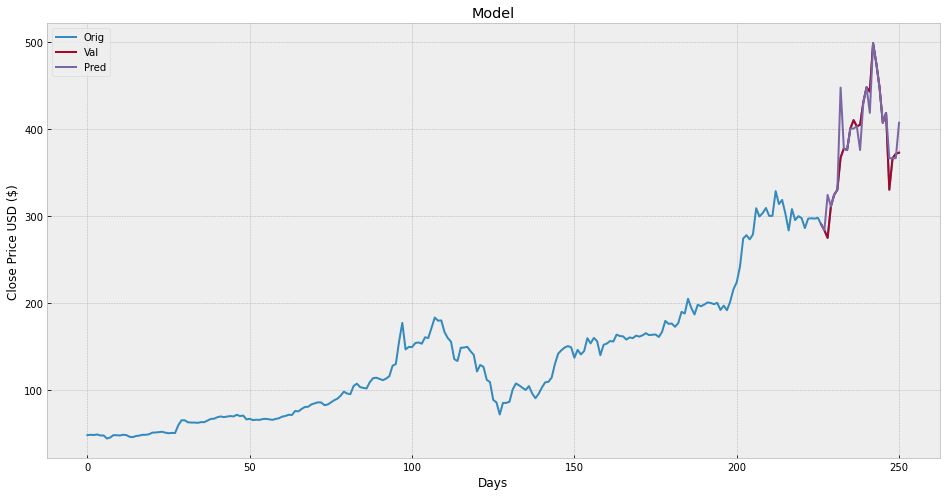

In [30]:
# visual the tree model
predictions = tree_prediction

# valid data is the actual close prices of the last 25 days
valid_data = df[X.shape[0]:]
valid_data['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid_data[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

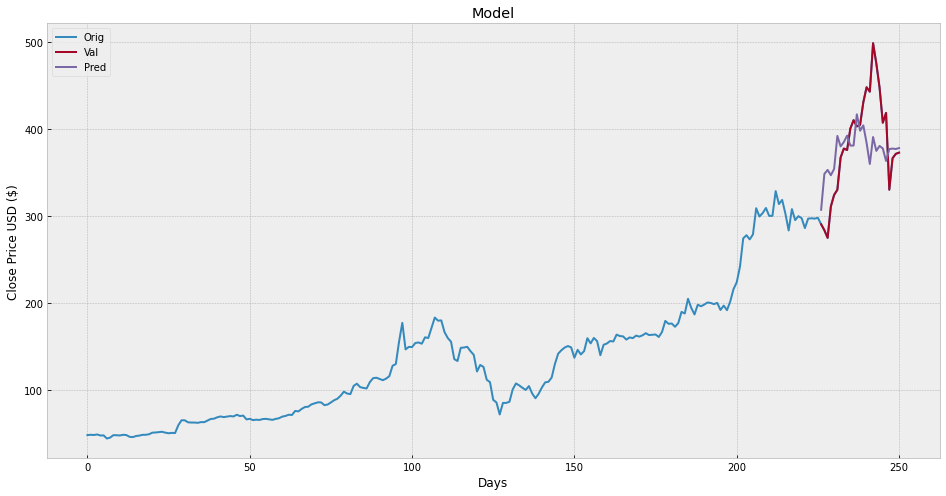

In [31]:
# visual the linear regression model
predictions = lr_prediction

# valid data is the actual close prices of the last 25 days
valid_data = df[X.shape[0]:]
valid_data['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid_data[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

In [ ]:
# This is a prototype, improve this and make it better!